# Iris Flower Classification
-----------

## Project Description:

The Iris Flower Classification project is a ML task that involves predicting the species of an Iris flower based on its physical attributes. Using a well-known dataset, the project aims to build a classification model that can accurately distinguish between three species of Iris flowers: Iris Setosa, Iris Versicolor, and Iris Virginica. 

The dataset, originally introduced by Ronald A. Fisher (1936), consists of 150 samples with four key numerical features (sepal length, sepal width, petal length, and petal width). It is widely available in the  UCI Machine Learning Repository or in Scikit-learn dataset. Due to its balanced nature and simplicity, it is widely used for testing and comparing different machine learning algorithms.

## Problem Statement

Given the Iris dataset, this project aims to implement and evaluate various machine learning classifiers to build a model capable of accurately predicting the species of a given flower based on its physical characteristics.

While Iris Setosa is easily distinguishable due to its well-separated feature distribution, Iris Versicolor and Iris Virginica have overlapping characteristics, making classification a more complex challenge.

## Objectives

The primary goals of this project are to:

1. Explore and preprocess the Iris dataset to understand patterns and relationships between features.
2. Develop and compare different ML models for species classification.
3. Evaluate model performance using different classification metrics to determine the best model for this problem.
4. Visualize results to gain insights into the classification process.
5. Deploy the best model for real-time classification of Iris flowers.

## Key Project Details
- **Dataset Source:** UCI Machine Learning Repository, Scikit-learn
- **Number of Observations:** 150 samples
- **Number of Features:** 4 (Sepal & Petal dimensions in cm)
  **Number of Classes:** 3 (Iris Setosa, Iris Versicolor, Iris Virginica)
- **Type of Problem:** Multiclass Classification
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-Score
- **Algorithms Considered:** Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Trees, Random Forest, Neural Networks
- **Challenges:** Overlapping feature distributions between Versicolor and Virginica

## Conclusion
After extensive data exploration, preprocessing, and evaluation of various Supervised Machine Learning models alongside a Neural Network, using a range of classification metrics such as precision, recall, F1-score, and accuracy, the best model for classifying the Iris flower into its three species (Setosa, Versicolor, and Virginica) was found to be the MLP (Multi-Layer Perceptron). Additionally, the following conclusions can be drawn:

- Data Exploration: Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. 
- Data Preprocessing: Essential preprocessing steps were applied, such as handling missing values and encoding categorical variables, to prepare the dataset for the modeling phase.
- Model Selection: After experimenting with multiple machine learning models, the Neural Network (NN) MLP was chosen as the final model due to its ability to effectively capture complex relationships between the features. It provided the best performance in classifying the Iris species compared to other models.
- Model Training and Evaluation: The Neural Network (NN) MLP model was trained on the dataset and evaluated using various metrics. The model demonstrated excellent classification performance, making it the best choice for this task.
- Challenges and Future Work: The future work could involve experimenting with deeper network architectures or different activation functions to enhance the model's performance further.
- Practical Application: The Iris flower classification model can be applied in real-world scenarios like botany and agriculture, where automated identification of Iris species can aid in research, cultivation, and conservation efforts.

In conclusion, the Iris flower classification project successfully utilized the Neural Network (NN) MLP model to classify Iris species. The model's outcomes provide valuable insights into species differentiation and have potential applications in fields like botany and horticulture. With further refinements, this approach could lead to even more accurate and robust classification models in the future.

## References
https://data-flair.training/blogs/iris-flower-classification/
https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv
https://github.com/Apaulgithub/oibsip_taskno1/blob/main/Iris_Flower_Classification.ipynb

------

## Code

### Import Libraries

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from tqdm import tqdm

from sklearn.datasets import load_iris

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

### Load the Dataset

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Analysis

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [153]:
print(f'The numer of rows are: {df.shape[0]} and columns: {df.shape[1]}')
print('-----')
print(f'The values that are to be classified are: {df["Species"].unique()}')
print('-----')
print(f'The variables that help classify the Species are: {df.columns[:-1]}')
print('-----')
print(f'The number of duplicated rows are: {df.duplicated().sum()}')
print('-----')
print(f'The missing values or null values count is: {df.isnull().sum().sum()}')

The numer of rows are: 150 and columns: 6
-----
The values that are to be classified are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
-----
The variables that help classify the Species are: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
-----
The number of duplicated rows are: 0
-----
The missing values or null values count is: 0


**Observations:** All the data is float type.  The dataset consists of 150 observations and 5 features (sepal length, sepal width, petal length, and petal width, all measured in centimeters), with the target variable Species containing 3 possible categories. There are no duplicated rows that need to be handled nor missing values, ensuring a complete dataset for analysis..

In [154]:
#Handle the duplicated observations

# df = df.loc[df.duplicated() == False]
# print(df.duplicated().sum())

In [155]:
#Delete the ID since it is non-essential
df = df.iloc[:,1:]

### Understanding the Variables

In [156]:
df.describe().round(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0540,3.7587,1.1987
std,0.8281,0.4336,1.7644,0.7632
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


**Observations:**
- The data appears well-distributed, with varying ranges for each feature.
- The feature distributions vary, with petal length and sepal length having a larger spread, which might be useful for classification.
- Petal length has the highest variation (std = 1.765298), followed by sepal length (cm), petal width (cm), and sepal width (cm).
- petal length (cm) ranges a from 1 to 6.9 cm which suggests a potential class separability.

### Data Visualization

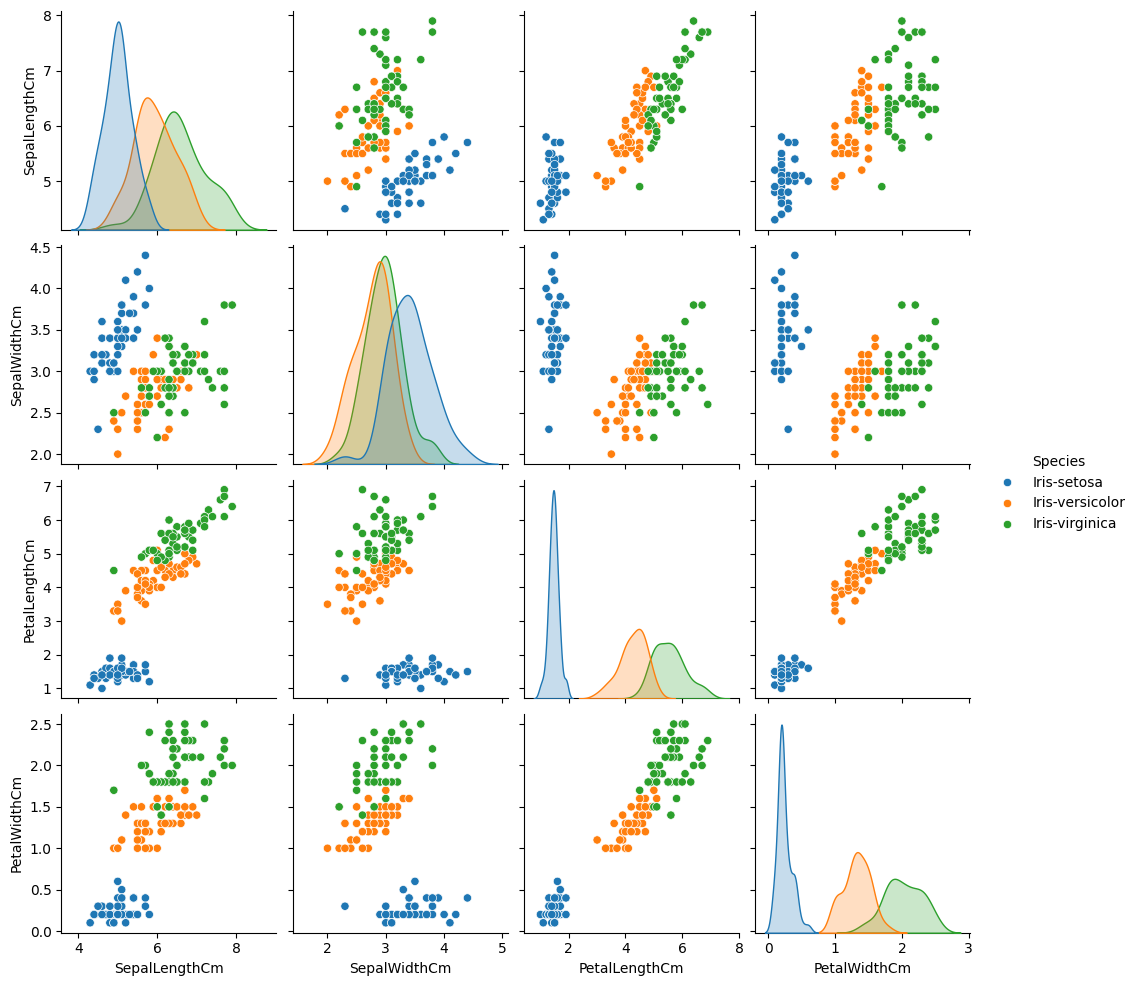

In [157]:
sns.pairplot(df, hue='Species')

**Observations:**
- Iris-setosa is well separated from the other two flowers from their petal lenght and petal width.
- Iris-versicolor and Virginica have similar sepal width.
- Iris versicolor has longer petal lenght than Virginiaca as well as petal width and sepal lenght; thus, the Virginica is the shortest specie.

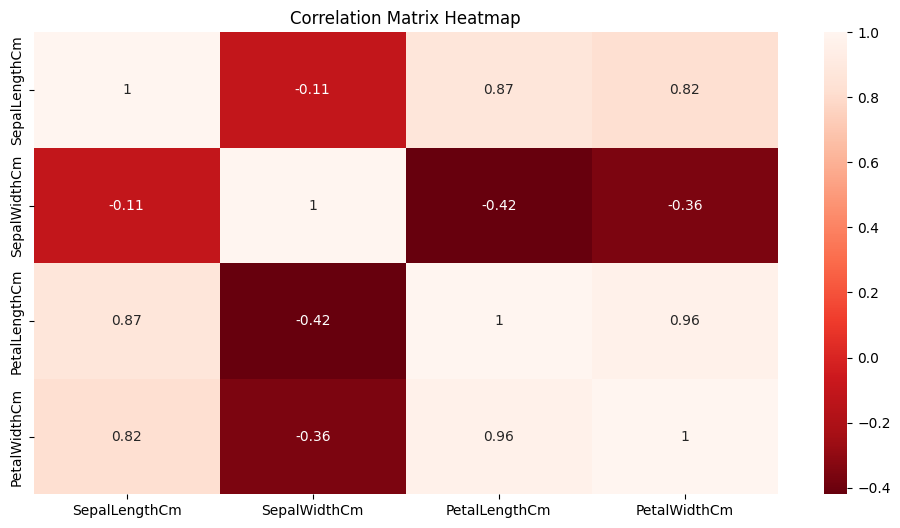

In [158]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap='Reds_r')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations:**
- There is a strong positive correlation between: 1) petal lenght and petal width, 2) sepal length and petal, 3) petal width and sepal length. 

The mean values per categorie and Specie are:
|               |   Iris-setosa |   Iris-versicolor |   Iris-virginica |
|:--------------|--------------:|------------------:|-----------------:|
| SepalLengthCm |         5.006 |             3.418 |            1.464 |
| SepalWidthCm  |         0.244 |             5.936 |            2.77  |
| PetalLengthCm |         4.26  |             1.326 |            6.588 |
| PetalWidthCm  |         2.974 |             5.552 |            2.026 |


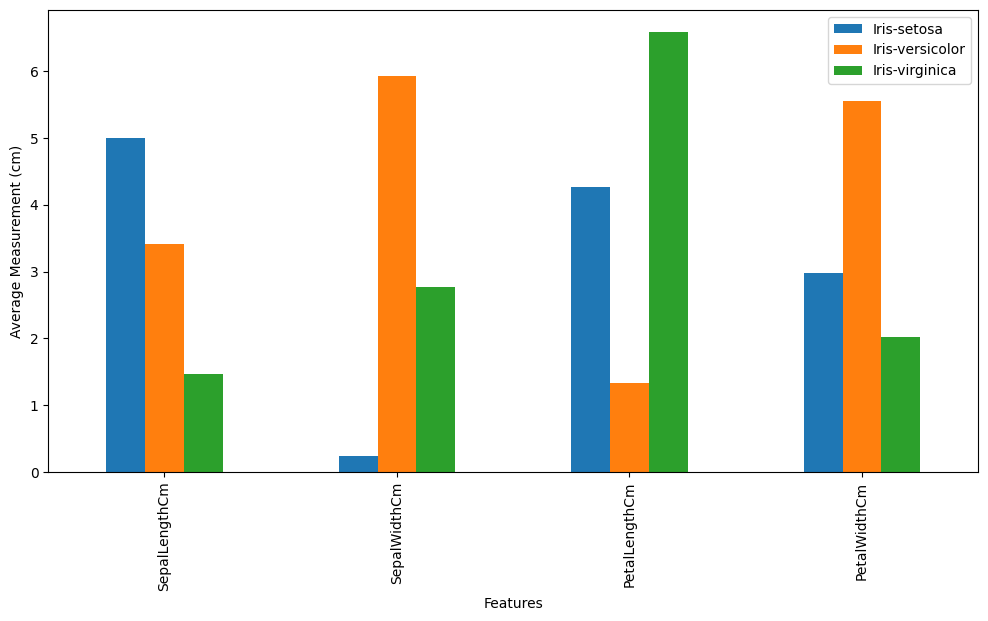

In [159]:
def get_average(specie, feature):
    return np.average(df.loc[df['Species'] == specie, feature])

species = df["Species"].unique()
features = df.columns[:-1]

combinations = list(product(species, features))
averages = list(map(lambda x: get_average(x[0], x[1]), combinations))
averages_reshaped = np.array(averages).reshape(4, 3)
average_df = pd.DataFrame(averages_reshaped, index=features, columns=species)

print('The mean values per categorie and Specie are:')
print(average_df.to_markdown())

average_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Average Measurement (cm)')
plt.show()

**Observations:**
- Setosa has the largest sepal lenght; while Versicolor the largest sepal width and Virginica the largest petal length. 
- The species Setosa and Virginica have similar petal width.

### Feature Engineering

In [160]:
# Categorical encoding the target variables
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
unique_species = df['Species'].unique()

print(f'Encoded Species Values : {unique_species}. Where 0 stands for "Iris-setosa", 1 for "Iris-versicolor" and 2 for "Iris-Virginica"')

Encoded Species Values : [0 1 2]. Where 0 stands for "Iris-setosa", 1 for "Iris-versicolor" and 2 for "Iris-Virginica"


### Data Preprocessing

In [161]:
x = df.drop(columns=['Species'], axis=1)
y = df['Species']

def split(x, y, size=0.3, state=None, strat=None):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state, stratify=strat)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(x, y, size=0.3, state=42, strat=y)

In [162]:
y_train.value_counts()

Species
1    35
0    35
2    35
Name: count, dtype: int64

### Model Training

In [163]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("True")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("True")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    F1_train = f1_score(y_train, y_pred_train, average='macro')
    F1_test = f1_score(y_test, y_pred_test, average='macro')

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

Evaluating Logistic Regression...

Confusion Matrix:


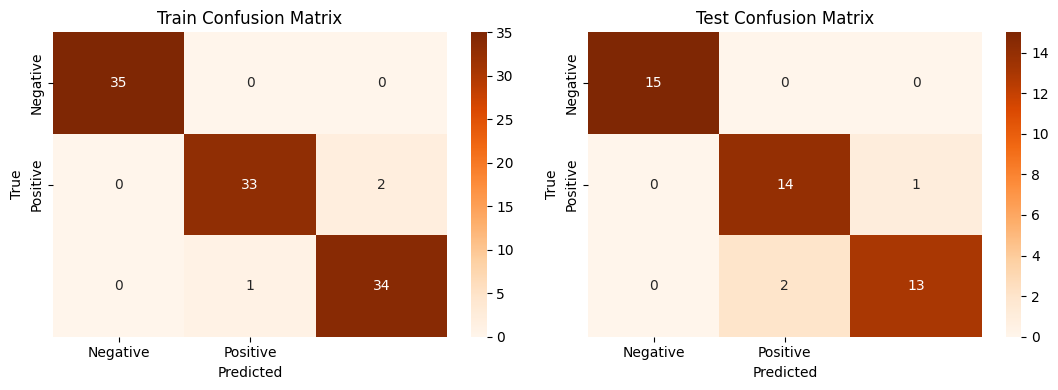


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971678 | 0.971429 |   0.971423 | 105        |
| weighted avg |    0.971678 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.875    | 0.933333 |   0.903226 | 15        |
| 2            |    0.928571 | 0.866667 |   0.896552 | 15        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

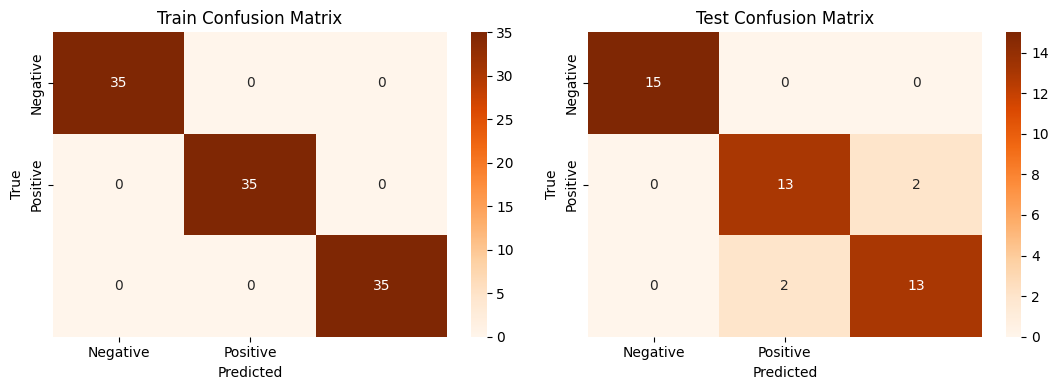


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 0.866667 |   0.866667 | 15        |
| 2            |    0.866667 | 0.866667 |   0.866667 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

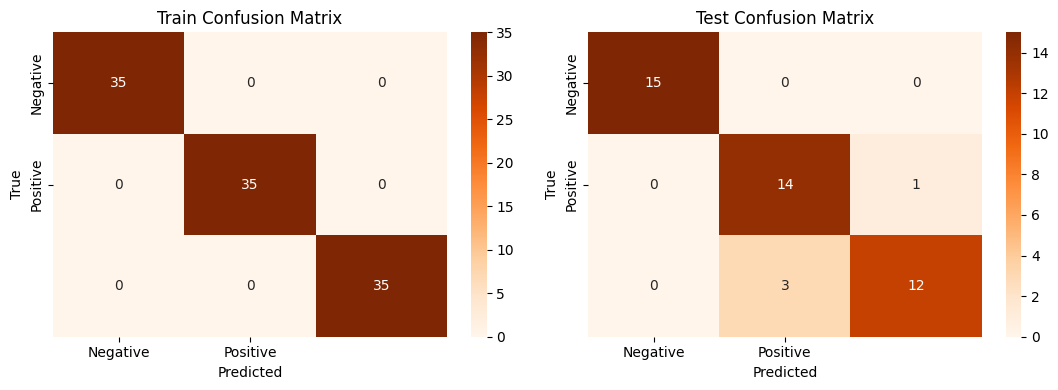


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.923077 | 0.8      |   0.857143 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

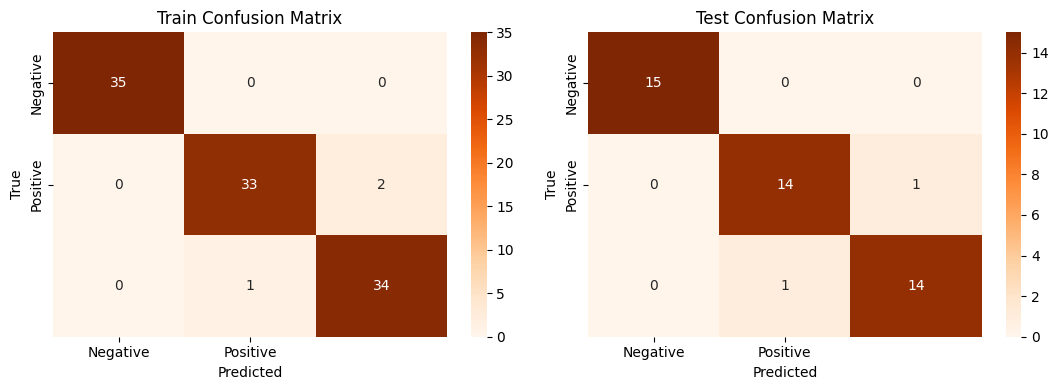


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971678 | 0.971429 |   0.971423 | 105        |
| weighted avg |    0.971678 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.933333 | 0.933333 |   0.933333 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

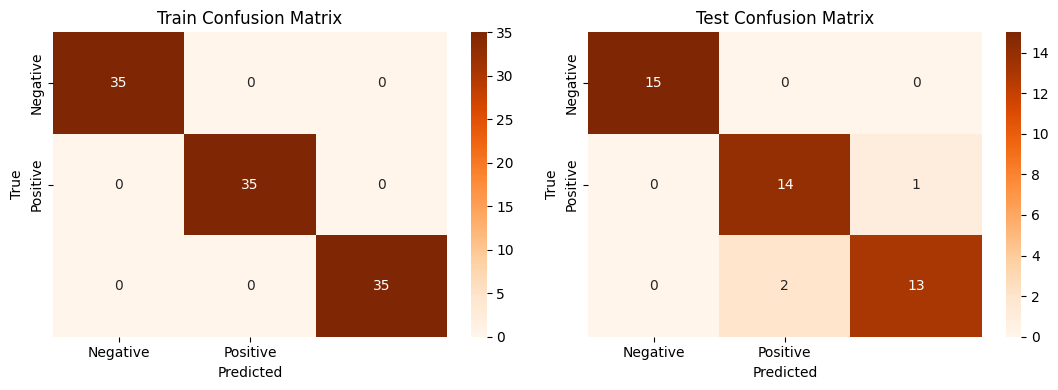


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.875    | 0.933333 |   0.903226 | 15        |
| 2            |    0.928571 | 0.866667 |   0.896552 | 15        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

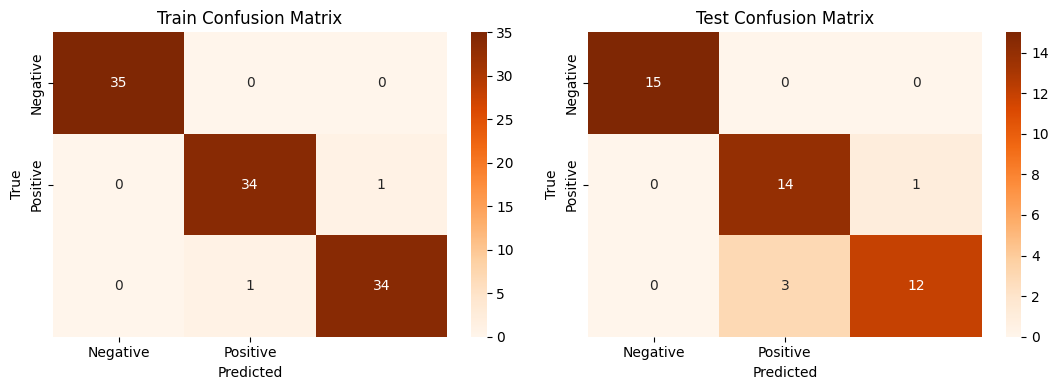


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980952 | 0.980952 |   0.980952 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.923077 | 0.8      |   0.857143 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

c:\Users\Admin\anaconda\envs\pythonProject\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Confusion Matrix:


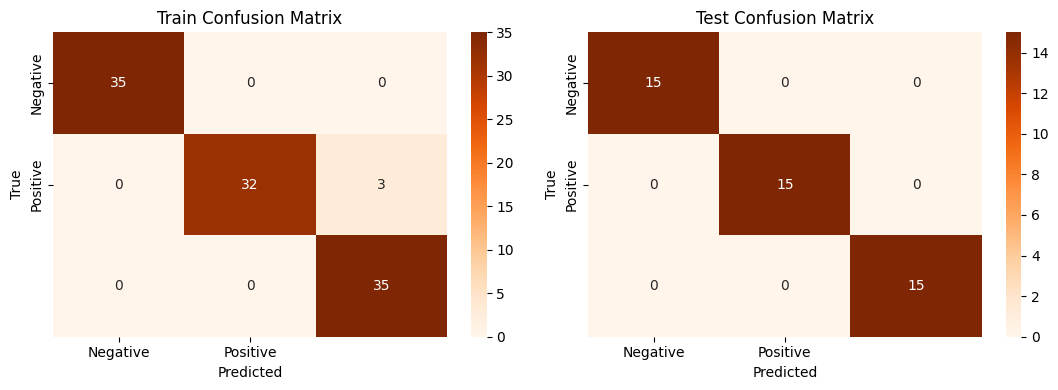


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.914286 |   0.955224 |  35        |
| 2            |    0.921053 | 1        |   0.958904 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.973684 | 0.971429 |   0.971376 | 105        |
| weighted avg |    0.973684 | 0.971429 |   0.971376 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        15 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

,Logistic Regression,Decision Tree,Random Forest,SVM,XGB,Gaussian NB,MLP
Precision Train,0.971678,1.000000,1.000000,0.971678,1.000000,0.980952,0.973684
Precision Test,0.934524,0.911111,0.915535,0.955556,0.934524,0.915535,1.000000
Recall Train,0.971429,1.000000,1.000000,0.971429,1.000000,0.980952,0.971429
Recall Test,0.933333,0.911111,0.911111,0.955556,0.933333,0.911111,1.000000
Accuracy Train,0.971429,1.000000,1.000000,0.971429,1.000000,0.980952,0.971429
Accuracy Test,0.933333,0.911111,0.911111,0.955556,0.933333,0.911111,1.000000
F1 macro Train,0.971423,1.000000,1.000000,0.971423,1.000000,0.980952,0.971376
F1 macro Test,0.933259,0.911111,0.910714,0.955556,0.933259,0.910714,1.000000


In [164]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGB': xgb.XGBClassifier(),
    'Gaussian NB': GaussianNB(),
    'MLP': MLPClassifier()
}

score = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

for model_name, model in models.items():
    print(f'Evaluating {model_name}...')
    score[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

score

In [165]:
max_df = pd.DataFrame({
    'Model': score.T.filter(like="Test").idxmax(),
    'Max Value': score.T.filter(like="Test").max()
})

max_df

,Model,Max Value
Precision Test,MLP,1.0
Recall Test,MLP,1.0
Accuracy Test,MLP,1.0
F1 macro Test,MLP,1.0


**Observations:** 
- A variety of Supervised Machine Learning (SML) models and a Neural Network (NN) were used to classify the Iris flowers into their respective species based on the previously mentioned features.
- Some models, such as Decision Tree, Random Forest, and XGBoost, achieved a training score of 1, indicating overfitting. This suggests that these models have learned the training data too well, but may not generalize effectively to unseen data.
- Currently, the model that performs best in classifying the flowers is the Multi-layer Perceptron (MLP) Neural Network. This model shows strong performance and better generalization compared to others.

### Hyperparameter Tunning

In [166]:
# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': np.arange(3, 9),
        'min_samples_split': np.arange(2, 8),
        'min_samples_leaf': np.arange(10, 20)
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': np.arange(8, 15),
        'min_samples_split': [2, 3, 4]
    },
    'SVM': {
        'C': np.linspace(0.1, 10, 10),
        'kernel': ['linear', 'rbf'],
    },
    'XGB': {
        'learning_rate': np.linspace(0.01, 0.3, 10),
        'max_depth': np.arange(3, 10),
        'n_estimators': np.arange(100, 200, 20)
    },
    'Gaussian NB': {
        'var_smoothing': np.logspace(-9, 0, 10)
    },
    'MLP': {
        'hidden_layer_sizes': [(x,) for x in np.arange(10, 100, 10)],
        'alpha': np.logspace(-4, -2, 5)
    }
}

# Define models
ht_models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=0),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0, probability=True),
    'XGB': xgb.XGBClassifier(random_state=0),
    'Gaussian NB': GaussianNB(),
    'MLP': MLPClassifier(random_state=0)
}

best_params = {}

# Run GridSearchCV for each model
for model_name, model in tqdm(ht_models.items(), desc="Hyperparameter Tuning Progress"):
    print(f"\nTuning {model_name}...")
    
    grid = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_params[model_name] = grid.best_params_
    print(f'Best hyperparameters for {model_name}: {grid.best_params_}')

Hyperparameter Tuning Progress:   0%|          | 0/7 [00:00<?, ?it/s]


Tuning Logistic Regression...


Hyperparameter Tuning Progress:  14%|█▍        | 1/7 [00:01<00:06,  1.07s/it]

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}

Tuning Decision Tree...


Hyperparameter Tuning Progress:  29%|██▊       | 2/7 [00:04<00:12,  2.56s/it]

Best hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 7}

Tuning Random Forest...


Hyperparameter Tuning Progress:  43%|████▎     | 3/7 [00:29<00:51, 12.82s/it]

Best hyperparameters for Random Forest: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 50}

Tuning SVM...


Hyperparameter Tuning Progress:  57%|█████▋    | 4/7 [00:29<00:23,  7.87s/it]

Best hyperparameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Tuning XGB...


Hyperparameter Tuning Progress:  71%|███████▏  | 5/7 [01:00<00:31, 15.90s/it]

Best hyperparameters for XGB: {'learning_rate': 0.042222222222222223, 'max_depth': 3, 'n_estimators': 100}

Tuning Gaussian NB...


Hyperparameter Tuning Progress:  86%|████████▌ | 6/7 [01:00<00:10, 10.61s/it]

Best hyperparameters for Gaussian NB: {'var_smoothing': 1e-09}

Tuning MLP...


c:\Users\Admin\anaconda\envs\pythonProject\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Hyperparameter Tuning Progress: 100%|██████████| 7/7 [01:14<00:00, 10.60s/it]

Best hyperparameters for MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (40,)}


In [167]:
print(f'The best parameters per model are: {best_params}')

The best parameters per model are: {'Logistic Regression': {'C': 10, 'penalty': 'l1', 'solver': 'saga'}, 'Decision Tree': {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 7}, 'Random Forest': {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 50}, 'SVM': {'C': 0.1, 'kernel': 'linear'}, 'XGB': {'learning_rate': 0.042222222222222223, 'max_depth': 3, 'n_estimators': 100}, 'Gaussian NB': {'var_smoothing': 1e-09}, 'MLP': {'alpha': 0.0001, 'hidden_layer_sizes': (40,)}}



Confusion Matrix:


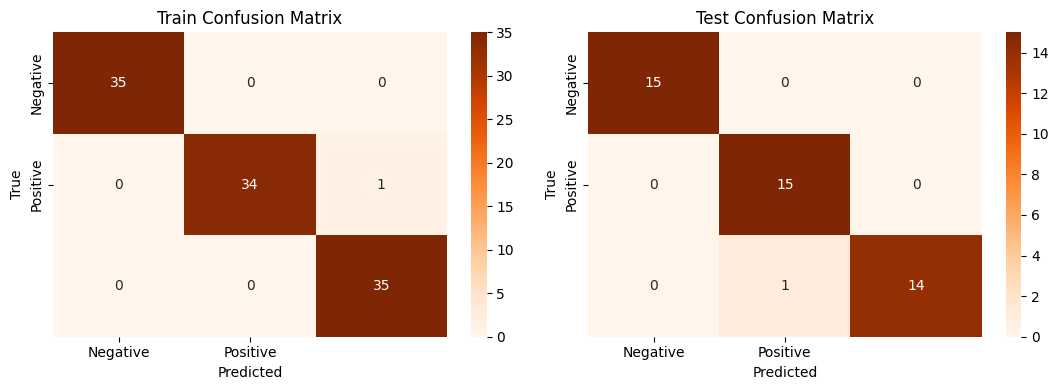


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.972222 | 1        |   0.985915 |  35        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990741 | 0.990476 |   0.990474 | 105        |
| weighted avg |    0.990741 | 0.990476 |   0.990474 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.9375   | 1        |   0.967742 | 15        |
| 2            |    1        | 0.933333 |   0.965517 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

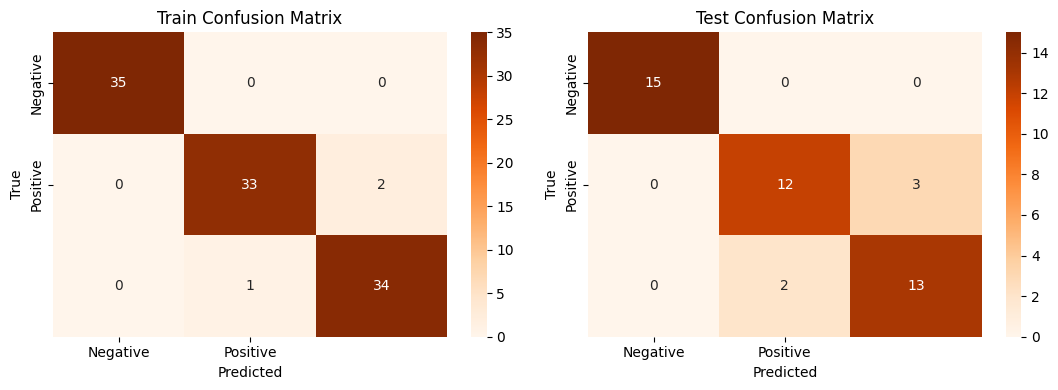


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971678 | 0.971429 |   0.971423 | 105        |
| weighted avg |    0.971678 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.857143 | 0.8      |   0.827586 | 15        |
| 2            |    0.8125   | 0.866667 |   0.83871  | 15        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

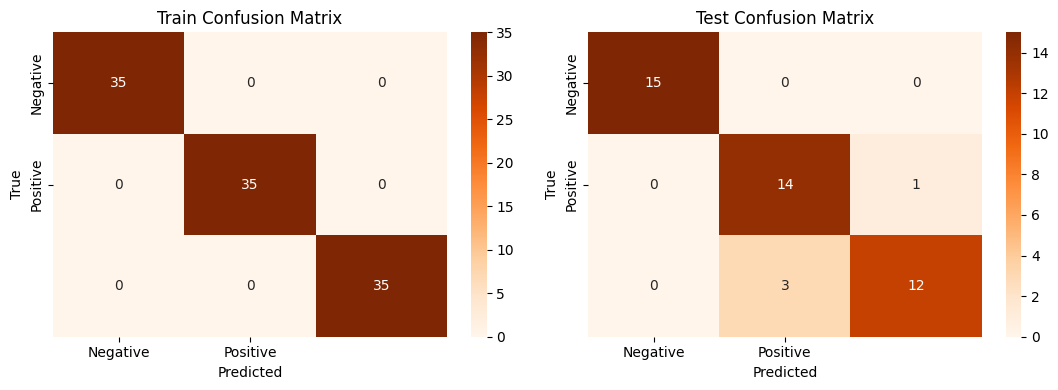


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.923077 | 0.8      |   0.857143 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

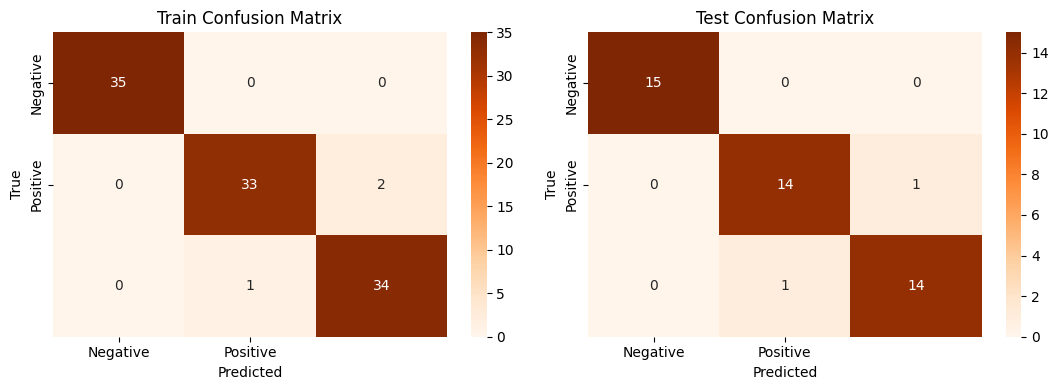


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971678 | 0.971429 |   0.971423 | 105        |
| weighted avg |    0.971678 | 0.971429 |   0.971423 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.933333 | 0.933333 |   0.933333 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

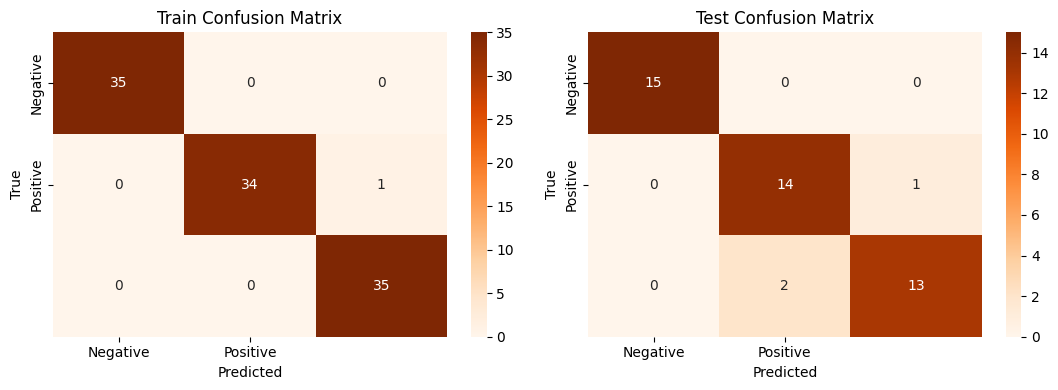


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.972222 | 1        |   0.985915 |  35        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990741 | 0.990476 |   0.990474 | 105        |
| weighted avg |    0.990741 | 0.990476 |   0.990474 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.875    | 0.933333 |   0.903226 | 15        |
| 2            |    0.928571 | 0.866667 |   0.896552 | 15        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

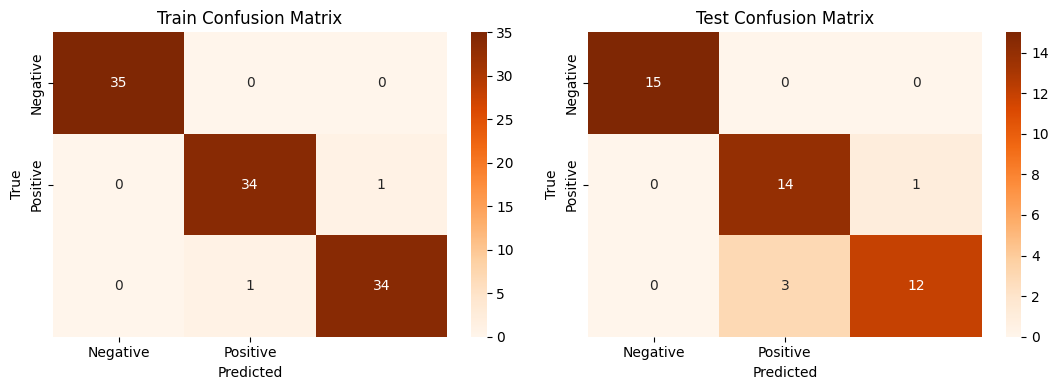


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980952 | 0.980952 |   0.980952 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.923077 | 0.8      |   0.857143 | 15        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

c:\Users\Admin\anaconda\envs\pythonProject\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Confusion Matrix:


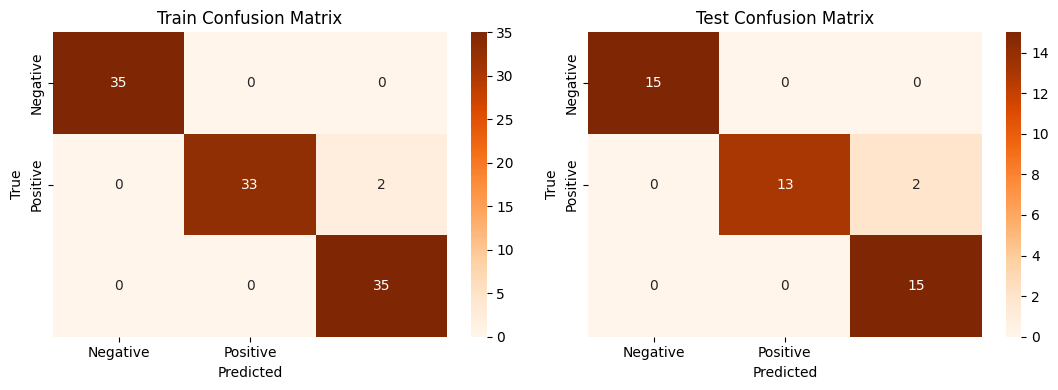


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.942857 |   0.970588 |  35        |
| 2            |    0.945946 | 1        |   0.972222 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981982 | 0.980952 |   0.980937 | 105        |
| weighted avg |    0.981982 | 0.980952 |   0.980937 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.866667 |   0.928571 | 15        |
| 2            |    0.882353 | 1        |   0.9375   | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

,Logistic Regression tuned,Decision Tree tuned,Random Forest tuned,SVM tuned,XGB tuned,Gaussian NB tuned,MLP tuned
Precision Train,0.990741,0.971678,1.000000,0.971678,0.990741,0.980952,0.981982
Precision Test,0.979167,0.889881,0.915535,0.955556,0.934524,0.915535,0.960784
Recall Train,0.990476,0.971429,1.000000,0.971429,0.990476,0.980952,0.980952
Recall Test,0.977778,0.888889,0.911111,0.955556,0.933333,0.911111,0.955556
Accuracy Train,0.990476,0.971429,1.000000,0.971429,0.990476,0.980952,0.980952
Accuracy Test,0.977778,0.888889,0.911111,0.955556,0.933333,0.911111,0.955556
F1 macro Train,0.990474,0.971423,1.000000,0.971423,0.990474,0.980952,0.980937
F1 macro Test,0.977753,0.888765,0.910714,0.955556,0.933259,0.910714,0.955357


In [168]:
ht = {
    model_name: ht_models[model_name].set_params(**best_params[model_name]) 
    for model_name in best_params
}

tunned_scores = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
for model_name, model in ht.items():
    tunned_scores[f'{model_name} tuned'] = evaluate_model(model, X_train, X_test, y_train, y_test)

tunned_scores

In [169]:
max_df = pd.DataFrame({
    'Model': tunned_scores.T.filter(like="Test").idxmax(),
    'Max Value': tunned_scores.T.filter(like="Test").max()
})

max_df

,Model,Max Value
Precision Test,Logistic Regression tuned,0.979167
Recall Test,Logistic Regression tuned,0.977778
Accuracy Test,Logistic Regression tuned,0.977778
F1 macro Test,Logistic Regression tuned,0.977753


**Observation:**
- The best tunned model is the Logistic Regression for the task.

### Model Selection

In [170]:
score_t = pd.concat([score, tunned_scores], axis=1).T

models_to_remove = score_t.loc[
    (score_t['Precision Train'] == 1) & (score_t['Recall Train'] == 1)
].index  

final = score_t.drop(models_to_remove)
final

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic Regression,0.971678,0.934524,0.971429,0.933333,0.971429,0.933333,0.971423,0.933259
SVM,0.971678,0.955556,0.971429,0.955556,0.971429,0.955556,0.971423,0.955556
Gaussian NB,0.980952,0.915535,0.980952,0.911111,0.980952,0.911111,0.980952,0.910714
MLP,0.973684,1.000000,0.971429,1.000000,0.971429,1.000000,0.971376,1.000000
Logistic Regression tuned,0.990741,0.979167,0.990476,0.977778,0.990476,0.977778,0.990474,0.977753
Decision Tree tuned,0.971678,0.889881,0.971429,0.888889,0.971429,0.888889,0.971423,0.888765
SVM tuned,0.971678,0.955556,0.971429,0.955556,0.971429,0.955556,0.971423,0.955556
XGB tuned,0.990741,0.934524,0.990476,0.933333,0.990476,0.933333,0.990474,0.933259
Gaussian NB tuned,0.980952,0.915535,0.980952,0.911111,0.980952,0.911111,0.980952,0.910714
MLP tuned,0.981982,0.960784,0.980952,0.955556,0.980952,0.955556,0.980937,0.955357


In [171]:
max_df = pd.DataFrame({
    'Model': final.filter(like="Test").idxmax(),
    'Max Value': final.filter(like="Test").max()
})

max_df

,Model,Max Value
Precision Test,MLP,1.0
Recall Test,MLP,1.0
Accuracy Test,MLP,1.0
F1 macro Test,MLP,1.0


**Observations:**
At the end the best model for this task was the NN: MLP. Closely followed by the Tuned Logistic Regression and the Tuned MLP.